In [12]:
from DataImporter import *

# `Pandas`

`Pandas` = panel data analysis

> 便捷的数据处理能力

> 读取文件方便

> 封装了 `Matplotlib`, `Numpy` 的画图和计算

核心数据结构

> `DataFrame`

> `Pannel`

> `Series`

## `DataFrame`

具有行索引和列索引.

常用属性: `shape`, `index`, `columns`, `values`, `T`

常用方法: `head()`, `tail()`


In [13]:
stock_exchange = np.random.normal(0, 1, (10, 5))

# 添加行索引
stock = [f'股票 {i}' for i in range(1, 11)]
# 添加列索引
date = pd.date_range(start='20230805', periods=5, freq='B')
data = DataFrame(stock_exchange, index=stock, columns=date)
print(data)

       2023-08-07  2023-08-08  2023-08-09  2023-08-10  2023-08-11
股票 1     1.946574    0.409687   -0.100292   -1.272934    0.611204
股票 2    -0.663842    0.102502   -0.606515    0.981038   -0.357988
股票 3    -1.000297    0.873605    0.369108   -0.284003    1.027945
股票 4    -0.533987   -0.231645   -1.189831    1.253064    0.294156
股票 5    -1.215649   -1.102527   -0.255376   -0.087438   -0.843012
股票 6     0.379171    0.903017    1.020673   -0.458889    1.076235
股票 7    -0.983578    2.046805    0.110829    1.158055   -0.498641
股票 8     0.727974    1.687082   -0.023841   -1.083508   -0.824306
股票 9    -0.721956   -0.135337    1.825445   -1.401161   -2.135257
股票 10   -1.841923    0.684784    0.238012   -0.154725   -0.906913


`DataFrame` 索引设置

`pandas` 不能单独修改一个索引.

In [14]:
stock = [f'股票-{i}' for i in range(1, 11)]
data.index = stock
data.reset_index(drop=True)  # drop=True 把之前的索引删除

df = DataFrame({
    'month': [1, 4, 7, 10],
    'year': [2012, 2014, 2013, 2014],
    'sale':[55, 40, 84, 31]
})
df.set_index('month', drop=True)
new_df = df.set_index(["year", "month"])

## `MultiIndex`

多级索引对象

In [15]:
print(new_df.index)
print(new_df.index.names)
print(new_df.index.levels)

MultiIndex([(2012,  1),
            (2014,  4),
            (2013,  7),
            (2014, 10)],
           names=['year', 'month'])
['year', 'month']
[[2012, 2013, 2014], [1, 4, 7, 10]]


## `Series`

带索引的一维数组

属性

`index`

`values`: 一维数组 `ndarrary`



In [16]:
Series(np.arange(3, 9, 2), index=['a', 'b', 'c'])


a    3
b    5
c    7
dtype: int32

## 基本数据操作

### 索引

1. 直接索引 (**先列后行**)

2. 按名字索引 `loc`

3. 按数字索引 `iloc`

4. 组合索引 `ix` (已经过时)

In [26]:
data = pd.read_csv('src/stock_day.csv')

data['open']['2018-02-26']
data.loc['2018-02-26', 'open']
data.iloc[1, 0]

22.8

### 赋值

In [27]:
data.open = 100
data.iloc[1, 0] = 222

### 排序

对内容排序: `sort_values(key=, ascending=)`

`key`: 按一个或多个键排序

`ascending`: 默认升序, `False` 降序

对索引排序: `sort_index()`

In [30]:
data.sort_values(by='high', ascending=False)  # 按最高价从大到小排列

data.sort_index()  # 对索引进行排序

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,100,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-03-03,100,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,100,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,100,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-06,100,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-14,100,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58
2018-02-22,100,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-23,100,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-26,222,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53


### `DataFrame` 运算

算术运算 `add`, `sub`

逻辑运算符 `<`, `>`, `|`, `&`

逻辑运算函数 

`query(expr)`: 查询字符串

`isin(values)`

统计运算 `describe()`: 直接得出 `count`, `mean`, `std` 等统计量.

`cumsum()`: 前 $n$ 个数之和

`cummax()`: 前 $n$ 个数的最大值

`cummin()`: 前 $n$ 个数的最小值

`cumprod()`: 前 $n$ 个数的积

<Axes: >

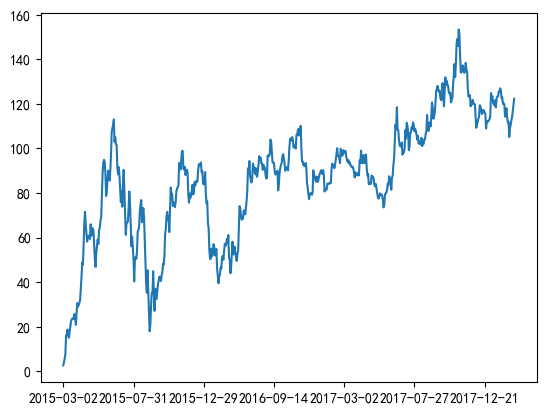

In [38]:
data['open'].add(3).head()
data.sub(100).head()
data[data['p_change'] > 2]
data.query('p_change > 2 & low > 15')
data['turnover'].isin([4.19, 2.39])
data.describe()
data['p_change'].sort_index().cumsum().plot()

### 自定义运算

`apply(func, axis=0)`

`func`: 自定义的函数

`axis`: 行/列, 默认按列, `axis=1` 进行行运算.

In [39]:
data.apply(lambda x: x.max() - x.min())

open               122.000
high                23.680
close               22.850
low                 21.810
volume          500757.290
price_change         6.550
p_change            20.060
ma5                 21.176
ma10                19.666
ma20                17.478
v_ma5           393638.800
v_ma10          340897.650
v_ma20          245969.790
turnover            12.520
dtype: float64

### `Pandas` 绘图

`DataFrame.plot(x=None, y=None, kind='line')`

`x`: label or position, default None

`y`: label, position or list of label, positions, default None

`kind`: `line`, `bar`, `barh`, `hist`, `pie`, `scatter`


<Axes: xlabel='volume', ylabel='turnover'>

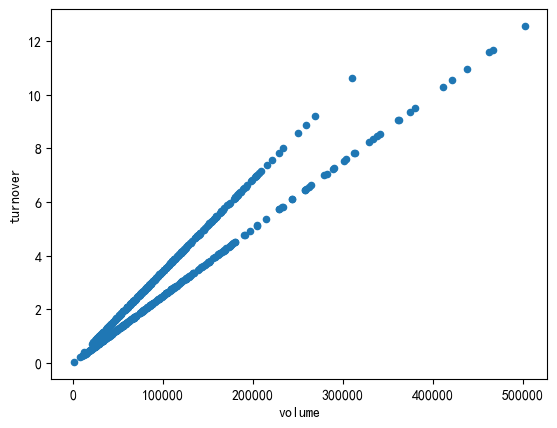

In [42]:
data.plot(x='volume', y='turnover', kind='scatter')

### 文件读取与存储

支持类型: `csv`, `json`, `html`, `clipboard`, `excel`, `hdf`, `sql`, ...

`pd.read_csv(path=, usecols=[], ...)` 依此类推, 详见 api.